<h3 style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 16px;
            font-weight: bold;
            color: #2d4059;">Table of Contents</h3>
    
- [Introduction](#introduction)<br><br>
- [Data Treatment](#data-treatment)<br><br>
- [Exploratory Data Analysis](#eda)<br><br>
   - [Binary Features](#eda-binary)<br><br>
   - [Continuous Features](#eda-continuous)<br><br>
   - [Target Variable](#eda-target)<br><br>
- [Baseline and Feature Selection](#baseline)<br><br>
- [Feature Engineering](#feat-eng)<br><br>
- [Modeling](#modeling)<br><br>
- [Testing](#testing)<br><br>
- [Model Explainability](#model-exp)<br><br>
- [Conclusion](#conclusion)<br><br>

<h1 id="introduction" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Introduction</h1>
<br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">In the age of social media, Instagram has become one of the most popular platforms for people to connect, share their lives, and build their personal brands. However, as the platform has grown in popularity, so has the prevalence of fake profiles and scammers. These profiles can be used for various malicious purposes, such as spreading misinformation, phishing, or even identity theft. To deal with this issue, machine learning can be used to automatically identify fake profiles and remove them from the platform.
<br><br>
In this notebook, we're going to explore how to build a machine learning classifier to identify fake Instagram profiles. We will start by collecting a dataset of Instagram profiles, both real and fake, and preprocess the data to extract relevant features. Then, we will train and evaluate several  models and evaluate their performance on validation data. Finally, we will choose the best-performing model and use it to classify profiles on unseen data. By the end of this notebook, you will have a better understanding of how machine learning can be applied to identify fake accounts on social media and how to build an application that can help make Instagram a safer place.
<br><br></div>

<h1 id="data-treatment" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Data Treatment</h1>
<br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">The first step to start with this project is to load the data and understand how information is structured within the dataset. Then, we apply all necessary changes to the dataset before working on exploratory data analysis and modeling.<br><br></div>

In [1]:
# Importing libraries 
import pandas as pd, numpy as np, plotly.express as px# manipulation and numerical operations
import plotly.graph_objects as go  # DataViz
from plotly.subplots import make_subplots # DataViz
import matplotlib.pyplot as plt # DataViz
import seaborn as sns # DataViz
from sklearn.pipeline import Pipeline # Pipeline for chaining multiple data preprocessing steps
from sklearn.preprocessing import StandardScaler # Data rescaling
from sklearn.model_selection import train_test_split # Data splitting 
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score # Evaluation Metrics
from sklearn.preprocessing import FunctionTransformer
import shap # Machine Learning explainability librart

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
# Loading data
train = pd.read_csv('train.csv') # Training dataset
test = pd.read_csv('test.csv') # Testing dataset

In [3]:
# Defining a function to return relevant information on the data
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Duplicated Values: ')    
    print(df.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    print('\n')
    print(f'Rows: {df.shape[0]}')   
    print(f'Attributes: {df.shape[1]}')
    print('\n')
    print('Head: ')
    print('\n')
    return df.head()

In [4]:
inspect(train)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 576
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
inspect(test)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 120
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
By using the <code>inspect</code> function above, we're able to gather a bunch of relevant information on the data we have at hands.<br><br>
First, we can see that there are no <b>missing values</b> to be dealt with. All features in both dataframes are numeric. Both dataframes are small, with the biggest of them having only 576 data samples. We have two duplicates in each dataframe that we must deal with. And, lastly, it's possible to observe that our dataframes are organized in, what appears to be, continuous and binary features. These are the features we have at hand: <br><br>
- <code>profile pic</code>: A binary feature indicating whether an account holds a profile pic or not; <br><br>
- <code>nums/length username</code>: A continuous feature indicating the ratio of numerical characters by the total length of an account's username; <br><br>
- <code>fullname words</code>: What seems to be a continuous feature counting the total words of the name of the person who holds the account;<br><br>
- <code>nums/lenght fullname</code>: A continuous feature indicating the ratio of numerical characters by the total length of the person's full name;<br><br>
- <code>name == username</code>: A binary feature that indicates if the name of the person is the same as the username; <br><br>
- <code>description length</code>: The length of the profile description. Probably the <i>bio</i>;<br><br>
- <code>external URL</code>: A binary feature indicating if a profile has a link for an external website in its bio;<br><br>
- <code>private</code>: A binary feature indicating if the profile is closed for non-followers or not; <br><br>
- <code>#posts</code>: A continuous feature containing the number of posts of that profile; <br><br>
- <code>#followers</code>: A continuous feature containing the total number of followers of each account; <br><br>
- <code>#follows</code>: A continuous feature containing the total number of people the account follows <br><br>
- <code>fake</code>: The target variable. Whether an account is fake or not. <br><br>
<br><br>
Consider that, for binary features, <code>0 = No</code> and <code>1 = Yes</code>.
<br><br></div>

In [6]:
# Visualizing duplicated rows in the training set
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [7]:
# Visualizing duplicated rows in the testing set
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
Duplicated rows can introduce bias to the model and lead to overfitting. So we're going to drop these.
<br><br></div>

In [8]:
# Removing duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# Printing new rows count
print('\n')
print(f'Train new rows count: {train.shape[0]}')
print(f'Test new rows count: {test.shape[0]}')



Train new rows count: 574
Test new rows count: 118


<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
Next, I'm going to write a function to store each feature to a <code>continuous_features</code> list and a <code>binary_features</code> list. This is going to be useful to group them together and make it easier for plots later on.
<br><br></div>

In [9]:
# Defining a function to categorize features
def categorize_features(df):
    # creating empty lists
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].nunique() <= 2: # if the number of unique values per feature is either equal or smaller than 2, it gets appended to the binary_features list
            binary_features.append(col)
        else:
            continuous_features.append(col) # In case it has more unique values than 2, it get appended to the continuous_feature list
    return continuous_features, binary_features

In [10]:
# Creating lists with the function
continuous_features, binary_features = categorize_features(train)

In [11]:
# Printing feature categorizations
print('\n')
print('Continuous features:')
print(continuous_features)
print('\n')
print('Binary features:')
print(binary_features)



Continuous features:
['nums/length username', 'fullname words', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']


Binary features:
['profile pic', 'name==username', 'external URL', 'private', 'fake']


<h1 id="eda" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Exploratory Data Analysis</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">After dealing with the whole data treatment process, we're able to perform some <b>exploratory data analysis</b> to understand how our data is distributed, and what kind of insights can be extracted from all this data.
<br><br>
First, let's take a look at the distribution of binary feature according to each target class label. That is, we're going to analyze how differently the binary attributes are distributed beyond real accounts and fake accounts.
<br><br></div>

<h2 id="eda-binary" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 22px;
            font-weight: bold;
            color: #2d4059;">Binary Features</h2>

In [12]:
binary_features.remove('fake') # Removing target variable from the list
# Creating another dataframe to label real and fake accounts
legend_df = train.copy()
legend_df['fake'] = legend_df['fake'].replace({0: 'Real Accounts', 1: "Fake Accounts"}) 

# plotting barplots for each binary feature

def create_barplots(df, legend_df):
    for feature in binary_features:
        fig = px.histogram(train, x=feature, color=legend_df['fake'],
                           color_discrete_sequence=['#636EFA','#EF553B'],
                           barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
        
        fig.update_layout(title=f'{feature}?',
                          xaxis_title=feature, yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['No', 'Yes']
                                                                               ),
                     height = 650)
        
        fig.show()

In [13]:
create_barplots(train,legend_df)

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">
<br><br>
<b>Insights 💡</b><br><br>
Some interesting patterns can be seen from looking at the distributions above:<br><br>
<b>1.</b> Most accounts with no profile pic are fake accounts;<br><br>
<b>2.</b> Overall, most accounts which name is the same as the username are also fake accounts;<br><br>
<b>3.</b> Surprisingly, it seems that all accounts who have an external URL to its bios are real accounts. Overall, most accounts don't have an external URL;<br><br>
<b>4.</b> Most accounts that are not private are fake accounts, while the majority of those who are indeed private are real accounts
<br><br></div>

<h2 id="eda-continuous" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 22px;
            font-weight: bold;
            color: #2d4059;">Continuous Features</h2><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">Now we can take a look at the distribution of continuous variables, so we might find the differences among real accounts and fake accounts.</div>

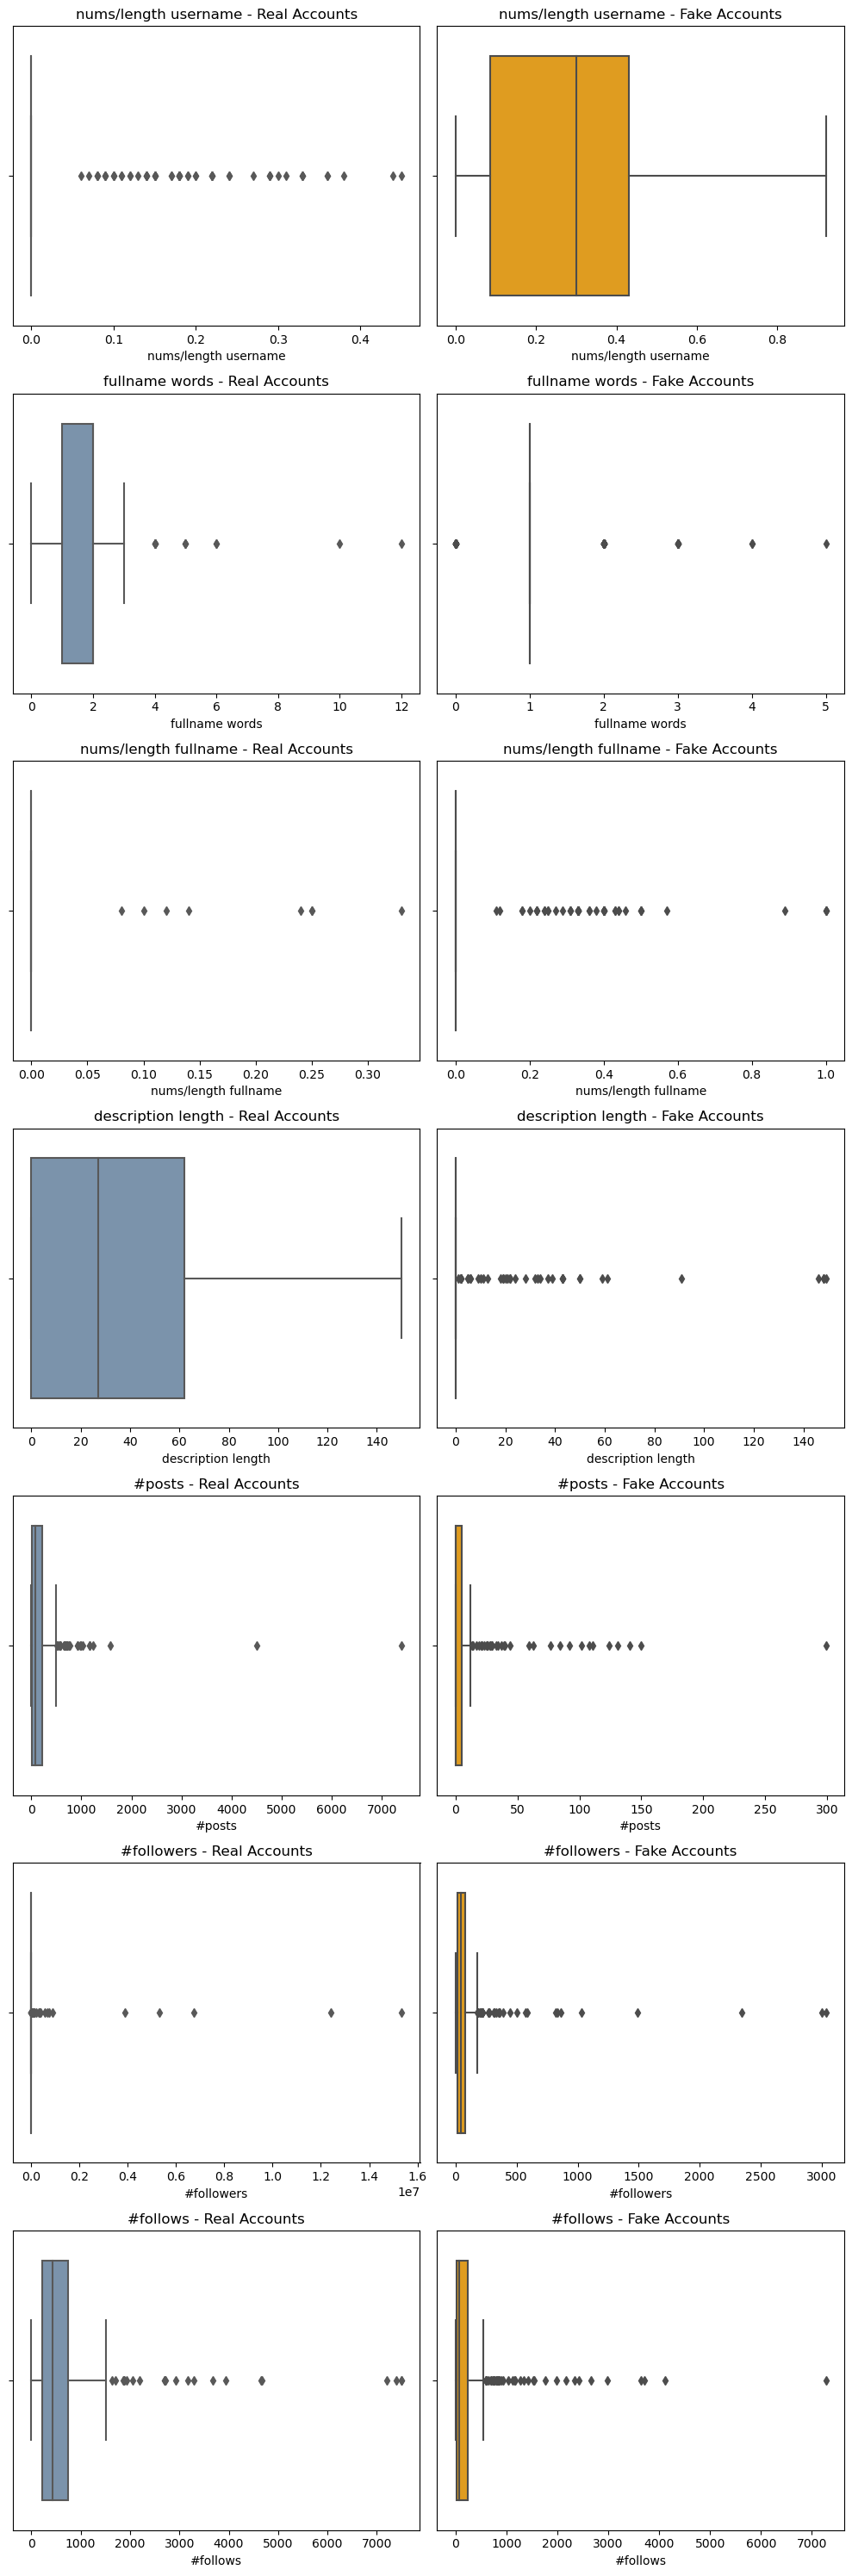

In [14]:
# Plotting Boxplots
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=2, figsize=(10, 30))

for i, col in enumerate(continuous_features):
    sns.boxplot(data=train[train['fake'] == 0], x=col, ax=axes[i, 0], color = '#7393B3')
    sns.boxplot(data=train[train['fake'] == 1], x=col, ax=axes[i, 1], color = 'orange')
    axes[i, 0].set_title(col + " - Real Accounts")
    axes[i, 1].set_title(col + " - Fake Accounts")

plt.tight_layout()
plt.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
<b>Insights 💡</b><br><br>
<b>1.</b> Fake accounts seem to have a larger percentage of numbers in their usernames<br><br>
<b>2.</b> Fake accounts tend to have lesser words in their full names<br><br>
<b>3.</b> Excluding outliers, it seems that fake accounts have much smaller descriptions/bios<br><br>
<b>4.</b> Real accounts have much more posts than fake accounts <br><br>
<b>5.</b> Real accounts have much more followers than fake accounts <br><br>
<b>4.</b> Overall, excluding outliers, it also seems that most fake accounts follow fewer people than real accounts on average<br><br>
We can see that we have <b>lots of outliers</b>! For that reason, I'm deciding to build a Random Forest baseline and using Gradient Boosting Algorithms for predictions, since these are robust to outliers.
<br><br></div>

<h2 id="eda-target" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 22px;
            font-weight: bold;
            color: #2d4059;">Target Variable</h2><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">Before proceeding, we must look at the distribution of the target variable, to see if it's balanced or unbalanced. This is going to helps us decide which algorithms to pick to train our model or, if necessary, which direction to take in case of strong class imbalance.</div>

In [15]:
fig = px.pie(legend_df, names='fake', title='Target variable distribution', color_discrete_sequence = ['#636EFA','#EF553B'])
fig.update_layout(template = 'ggplot2')
fig.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">No class imbalance in the target variable! That's good news. We might go on to the next steps without having to worry about unbalanced classes.</div>

<h1 id="baseline" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Baseline and Feature Selection</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">The idea behind using a baseline model is to establish a simple model that can be used as a benchmark for evaluating the performance of our final models. The baseline model serves as a reference point to compare the performance of other models and to also comprehend what roles each feature is playing when it comes to predicting the target variable. We can use the baseline model to measure the quality of our variables and even to look for the most relevant variables for feature engineering.
<br><br>
We're going to use a Random Forest Classifier as a baseline, and measure its accuracy with the AUC-ROC score.
<br><br></div>



AUC-ROC Baseline:  0.92




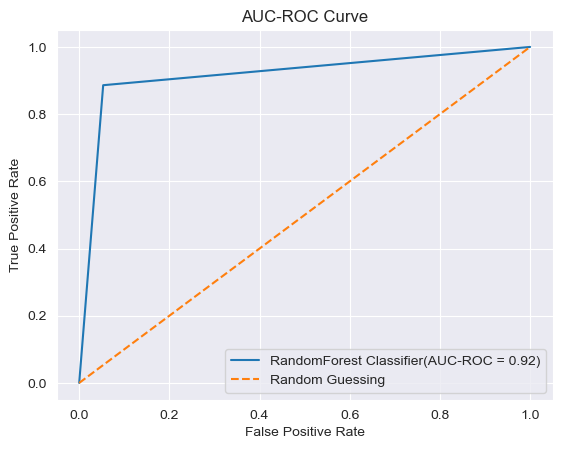



y_val value counts
0    94
1    79
Name: fake, dtype: int64


predicted value counts
(array([0, 1]), array([98, 75]))


In [16]:
# Training, predicting and evaluating baseline

# Splitting dataset into independent variables (X) and target variable (y)
X = train.drop('fake', axis = 1)
y = train['fake']

# Creating training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initializing mode
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train) # Fitting to training data 

y_pred = rf.predict(X_val) # Predicting on validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

baseline_score = roc_auc_score(y_val, y_pred)
print('\n')
print('AUC-ROC Baseline: ', baseline_score.round(2))
print('\n')

sns.set_style('darkgrid')
sns.lineplot(x='FPR', y='TPR', data=roc_df, label=f'RandomForest Classifier(AUC-ROC = {baseline_score.round(2)})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('\n')
print('y_val value counts')
print(y_val.value_counts())
print('\n')
print('predicted value counts')
print(np.unique(y_pred, return_counts=True))

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
The baseline model performed extremely well, with an AUC-ROC score of 0.92.<br><br>
    The original <i>y_val</i> set had 94 real accounts and 79 fake accounts. Our classifier predicted 98 real accounts and 75 fake accounts.
<br><br>
Now, for feature selection, we may use the <code>SHAP</code> library to plot a bar plot containing the importance that each feature displayed for predicting the target variable
<br><br></div>

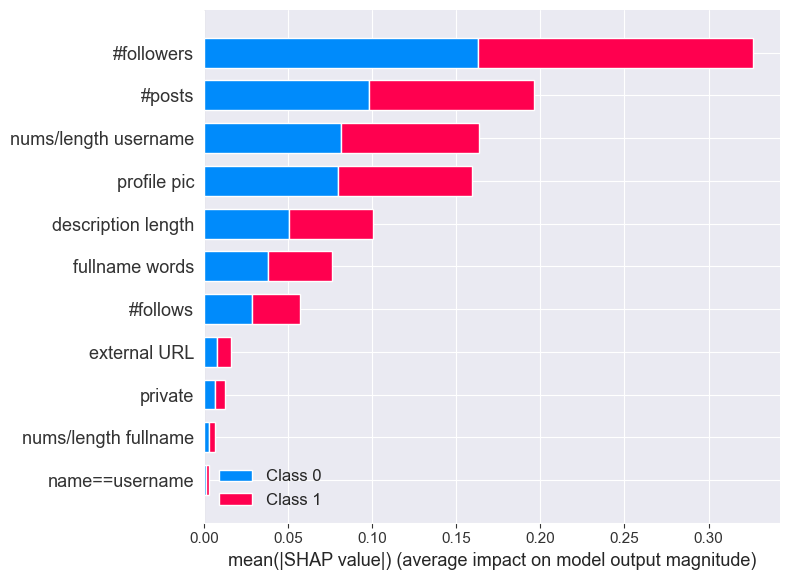

In [17]:
# Plotting Feature Importance plot
shap_values = shap.TreeExplainer(rf).shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
It seems that, overall, all features impacted the output in someway or another, so we don't have any feature acting as a dead weight.
<br><br>
Knowing what the most relevant features were, we can now perform some feature engineering to create new features, preferably deriving from relevant attributes, to try to enhance the robustness of our final models' predicting abilities.
<br><br></div>

<h1 id="feat-eng" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Feature Engineering</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;">While studying the data, I've decided to create 2 new features that I consider that could be relevant to predict the target variable. These are:<br><br>

<code>Activity Ratio:</code> This is simply a way to measure an account posting activity according to the number of followers it has. It's given by the following equation:<br><br>

Activity Ratio = $\frac{\text{Number of Posts}}{\text{Number of Followers}}$

<br><br>
<code>#Followers > #Follows ?</code>: At prior, I tend to believe that the majority of fake accounts will have much fewer followers than the amount of people they themselves follow. So this binary feature will tag as either 0 or 1, for each account. Where 1 will imply that that specific account has more followers than they follow. This may turn out to be a relevant feature for target prediction.<br><br></div>

In [18]:
# create activity ratio feature
train['activity ratio'] = np.round(train['#posts'] / train['#followers'], 2)

# Does the account have more followers than follows?
train['#followers > #follows?'] = (train['#followers'] > train['#follows']).astype(int)

In [19]:
# Visualizing new features on the dataframe
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0,0.03,1
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0,0.10,1
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0,0.08,1
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0,1.64,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1,0.20,0
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1,0.67,0
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1,0.04,0
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1,0.00,0


<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
We can now plot the information we've added to the dataframe and see if these new features tells us something or not.
<br><br></div>

In [20]:
fig = px.histogram(train, x=train['#followers > #follows?'], color=legend_df['fake'],
                   color_discrete_sequence=['#636EFA','#EF553B'],
                   barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
        
fig.update_layout(title='More Followers than Follows Distribution',
                  xaxis_title='#followers > #follows?', yaxis_title='Count', xaxis=dict(tickmode='array',
                  tickvals=[0, 1],
                  ticktext=['No', 'Yes']),
                  height = 800)
        
fig.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
It seems that my prior deduction was right! The majority of accounts who follows more people than they are followed are fake accounts. While accounts with more followers than following, are real accounts.
<br><br>
That's great! We found another relevant pattern.
<br><br></div>

In [21]:
# Plotting Activity Ratio plot
fig = px.box(train, x='fake', y='activity ratio', color = legend_df['fake'], title = "Activity Ratio")

fig.update_layout(xaxis_title="Real/Fake", yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['Real Accounts', 'Fake Accounts']
                                                                               ),
                     height = 650)

# Show the plot
fig.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
Overall, real accounts have a higher activity ratio than fake accounts. However, there are much more outliers, with an extremely positive activity ratio for fake accounts than for real accounts, which may also indicate something for our models when trying to predict the target variable.
<br><br>
After performing the feature engineering above, it's important to once again check for null and inf values.
<br><br></div>

In [22]:
train.isnull().sum()

profile pic                0
nums/length username       0
fullname words             0
nums/length fullname       0
name==username             0
description length         0
external URL               0
private                    0
#posts                     0
#followers                 0
#follows                   0
fake                       0
activity ratio            15
#followers > #follows?     0
dtype: int64

In [23]:
train.isin([np.inf, -np.inf]).sum()

profile pic               0
nums/length username      0
fullname words            0
nums/length fullname      0
name==username            0
description length        0
external URL              0
private                   0
#posts                    0
#followers                0
#follows                  0
fake                      0
activity ratio            3
#followers > #follows?    0
dtype: int64

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
<code>activity ratio</code> Generated some missing and inf values. We're gonna drop them!
<br><br></div>

In [24]:
# replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
train.dropna(inplace=True)

<h1 id="modeling" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Modeling</h1><br>
            
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
Finally, we're getting close to modeling!<br><br>
Before, however, I'm going to measure the means and standard deviations for all the features in the dataset to see if we must rescale our data or not. When we see the means and standard deviations for the features, we can get a sense of the relative scale of them. If some features are in a much larger scale than others, then they may dominate the learning process, and the other features may be ignored. In contrast, if all the features have a similar range of values, then they will all contribute equally to the learning process.
<br><br></div>

In [25]:
# Measuring mean values and standard deviations
df_means = train.mean().round(2)
df_stds = train.std().round(2)
results = pd.concat([df_means, df_stds], axis = 1)
results.columns = ['Mean', 'Standard Deviation']
results

,Mean,Standard Deviation
profile pic,0.72,0.45
nums/length username,0.16,0.21
fullname words,1.47,1.06
nums/length fullname,0.04,0.13
name==username,0.03,0.18
description length,23.27,38.13
external URL,0.12,0.33
private,0.37,0.48
#posts,110.94,408.69
#followers,88366.21,926256.64


<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br><br><br>
We can see that some features such as <code>#followers</code> and <code>#follows</code> are on a much larger scale than the rest of the features in the dataframe, which can introduce bias to our final models.<br><br>
We're going to add another step to our pipelines to rescale these features using Standard Scaler, to ensure that they are all on the same range of values. <br><br></div>

In [26]:
# Splitting Independent Features X and target variable y
X = train.drop('fake', axis = 1)
y = train.fake

In [27]:
# Spitting data into training and validation sets. 35% of data will be used for validation
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.35, random_state = 123)

XGBoost: AUC-ROC score = 0.90
LGBM: AUC-ROC score = 0.89
CatBoost: AUC-ROC score = 0.93
AdaBoost: AUC-ROC score = 0.89


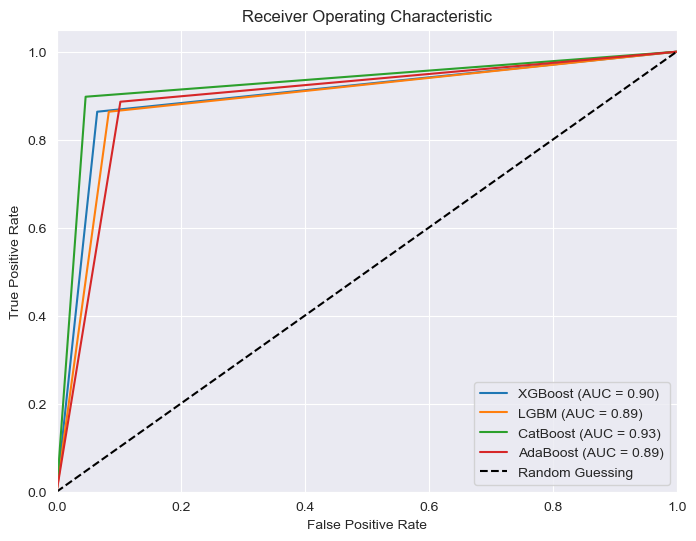

In [28]:
# Defining models
models = {
    "XGBoost": XGBClassifier(random_state = 42),
    "LGBM": LGBMClassifier(random_state = 42),
    "CatBoost": CatBoostClassifier(verbose=False, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42)
}

# Defining the pipeline process for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("scaler", StandardScaler()), # Rescaling data
        ("model", model) # Initializing model
    ])

# Fitting and computing AUC-ROC scores
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    results[name] = {
        "pipeline": pipeline,
        "auc": auc
    }
    print(f"{name}: AUC-ROC score = {auc:.2f}")

# Plot AUC-ROC curve for all models
plt.figure(figsize=(8, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result["pipeline"].predict(X_val))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br><br><br>
Overall, most models didn't perform any better than the <b>baseline</b>. The CatBoost was the one that achieved the highest performance, being the only one that outperformed the baseline.
<br><br></div>

<h1 id="testing" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Testing</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>After training and validating different models, we reach the conclusion that the CatBoost model performed better. <br><br>
Now, we can test our model performance on the test set. Before doing that, we need to perform the same procedures we've performed previously on the testing/val sets. First, I'll create the new features in the test set and use the Pipeline to guarantee that the same rescaling process done on the training/val sets will be done on the testing set.
<br><br></div>

In [29]:
# Creating activity ratio feature
test['activity ratio'] = np.round(test['#posts'] / test['#followers'], 2)

# Does the account has more followers than follows?
test['#followers > #follows?'] = (test['#followers'] > test['#follows']).astype(int)

# replace infinite values with NaN
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
test.dropna(inplace=True)

In [30]:
test # Displaying test set

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1,0.00,0


In [31]:
X = test.drop('fake', axis = 1) # Independent variables
y = test.fake # target variable 

In [32]:
X # Displaying independent variables

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,activity ratio,#followers > #follows?
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0.07,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0.09,1
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0.97,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0.02,1
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,0.11,0
116,1,0.40,1,0.00,0,0,0,0,4,150,164,0.03,0
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,0.00,0
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,0.00,0


In [33]:
y.value_counts() # Counting values for the target variable

0    60
1    56
Name: fake, dtype: int64

In [34]:
catboost_pipeline = results["CatBoost"]["pipeline"] # Creating a CatBoost model

y_pred = catboost_pipeline.predict(X) # Predicting on test data 

CatBoos: AUC-ROC score on unseen data = 0.9214


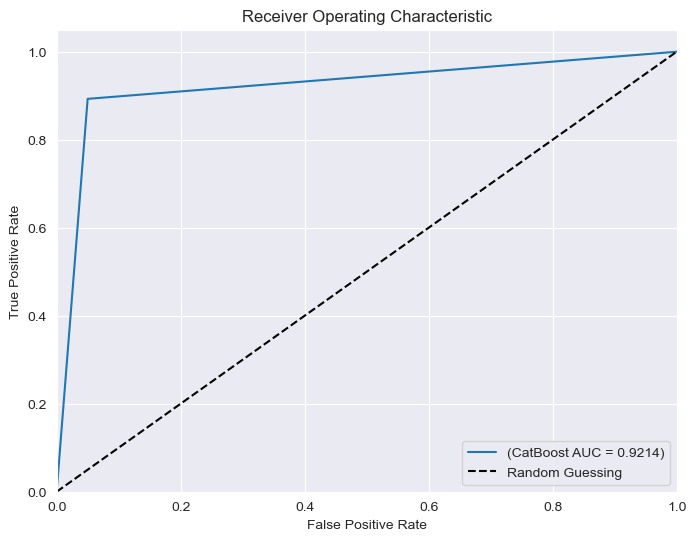

Value counts for y:
0    60
1    56
Name: fake, dtype: int64


Value counts for y_pred:
0    63
1    53
dtype: int64




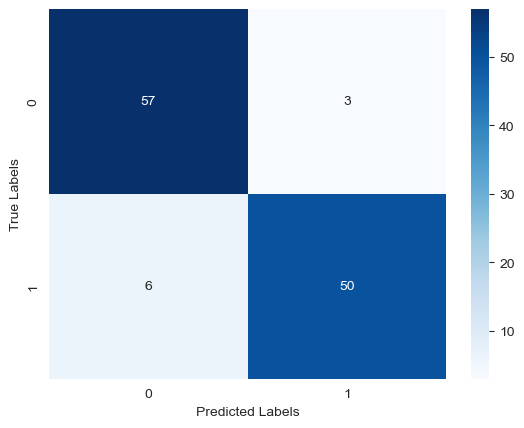



Recall Score: 89.0%


In [35]:
# Computing AUC-ROC score
auc = roc_auc_score(y, y_pred)
print(f"CatBoos: AUC-ROC score on unseen data = {auc:.4f}")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y, catboost_pipeline.predict(X))
plt.plot(fpr, tpr, label=f"(CatBoost AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing value counts
print("Value counts for y:")
print(y.value_counts())
print('\n')
print("Value counts for y_pred:")
print(pd.Series(y_pred).value_counts())
print('\n')
# Plotting confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(f'Recall Score: {np.round(recall_score(y, y_pred),2) * 100}%') # Printing Recall Score

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
Our final model has reached an AUC-ROC score of 0.9214, indicating that it is efficient in classifying and identifying fake Instagram accounts.<br><br>
In the original <i>y</i> test, we have 60 real accounts and 56 fake accounts, while our model identified 63 real accounts and 53 fake accounts. We can see, on the <b>Confusion Matrix</b> that we've had 6 false negatives, that is, 6 fake accounts that the model classified as real. We've also had 3 fake positives, which are real accounts that the model identified as fake.<br><br>
Finally, the <b>Recall Score</b> shows us that the model correctly flagged 89% of fake accounts, 50 out of 56.
<br><br></div>

<h1 id="model-exp" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Model Explainability</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>Model explainability is extremely important to understand how our model works and what was relevant during its classification process. It allows us to understand the results we've achieved, as well as help us understand how effective the new features we've created were in predicting the target variable.
<br><br>
We can, once again, use the <code>SHAP</code> library for that.
<br><br></div>

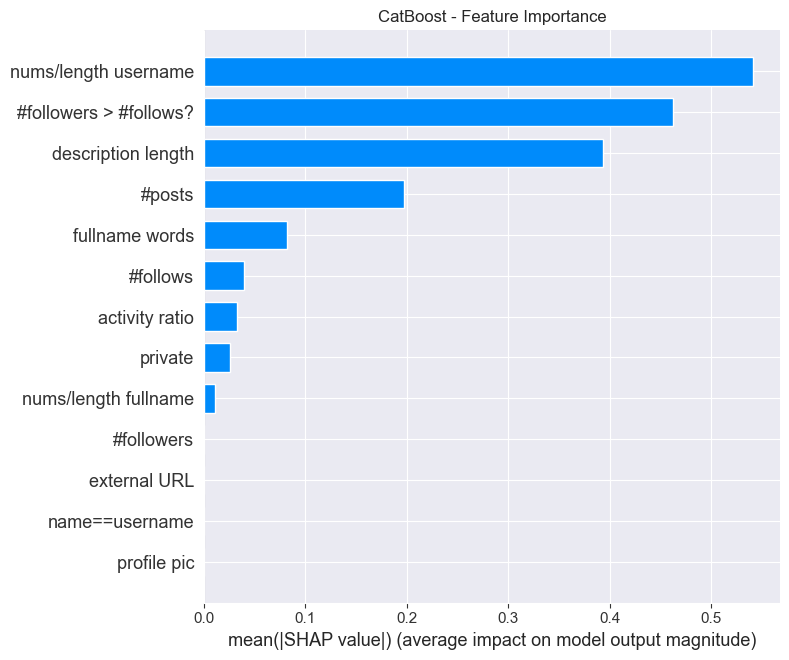

In [36]:
# Extracting the model and explainer
model = catboost_pipeline.named_steps['model']
explainer = shap.Explainer(model, X_train)

# Computing the SHAP values
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title('CatBoost - Feature Importance')
plt.tight_layout()
plt.show()

<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>
On the plot, <b>CatBoost - Feature Importance</b>, we can see the average impact each feature has on the model's predictions. It is extremely satisfying to see that the feature we've created during the feature engineering process was the second most important feature on the plot. It suggests that the model relies significantly on the feature <code>#followers > #follows?</code> to predict whether an account is fake or not, which displays its relevance to identify patterns between real and fake accounts.
<br><br></div>

<h1 id="conclusion" style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 28px;
            font-weight: bold;
            color: #2d4059;">Conclusion</h1><br>
<div style="font-size: 18px;
            line-height: 1.5;
            margin-bottom: 20px;
            font-family: Arial, sans-serif;"><br><br>During the development of this project, we performed multiple data treatment and data analysis tasks to identify patterns and extract insights from data.<br><br>
We could successfully point to differences between fake accounts and real accounts on Instagram, by identifying that real accounts have more posts than fakes, and that fakes generally follow more people than real accounts, as well as other different traces between them.<br><br>
By developing a baseline model, we've established a benchmark to compare our final models to. That also allowed us to understand what features displayed a high predicting importance of the target variable to the baseline model, which helped us to select relevant features for the feature engineering process. <br><br>
After creating new features, we could also identify relevant patterns on them, such as the fact that most accounts following more people than they had followers were mostly fake accounts. This feature alone turned out to have a significant impact on the final model output.<br><br>
Finally, after testing a bunch of different Gradient Boosting algorithms, the CatBoost model achieved the higher AUC-ROC score, being picked to perform final predictions on the test dataset and efficiently scoring 0.9214 on the test set, correctly identifying 89% of fake accounts. <br><br>
<br><br><br><br>
Thank you for reading. Don't forget to leave a comment and upvote. I'd love to hear your suggestions on how results could improve and your overall comprehension on the project above.<br><br><br><br>